<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [14]:
def sum_prod(X, V):
    sum = np.zeros_like(V[0])
    for i in range(len(X)):
        sum += X[i] @ V[i]
    return sum
print(sum_prod(np.array([[1,1],[1,1]]),np.array([[1,2],[2,1]])))
print(sum_prod(np.array([[2,2],[1,1]]),np.array([[1,3],[1,4]])))

[6 6]
[13 13]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [17]:
def binarize(m, threshold=0.5):
    m = np.array(m)
    return (m > threshold).astype(int)
print(binarize(np.array([[5, 2, 1],[1, 4, 3]]),2))
print(binarize(np.array([[5, 100, 101],[150, 45, 36]]),50))

[[1 0 0]
 [0 1 1]]
[[0 1 1]
 [1 0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    mat = np.array(mat)
    return [np.unique(row).tolist() for row in mat]

def unique_columns(mat):
    mat = np.array(mat)
    return [np.unique(mat[:, i]).tolist() for i in range(mat.shape[1])]

print(unique_rows([[5, 101, 101],[150, 45, 45],[150, 36, 36]]))
print(unique_columns([[5, 101, 101],[150, 101, 45],[150, 36, 36]]))

[[5, 101], [45, 150], [36, 150]]
[[5, 150], [36, 101], [36, 45, 101]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[-0.19702519] [0.] [-0.19702519] [0.]


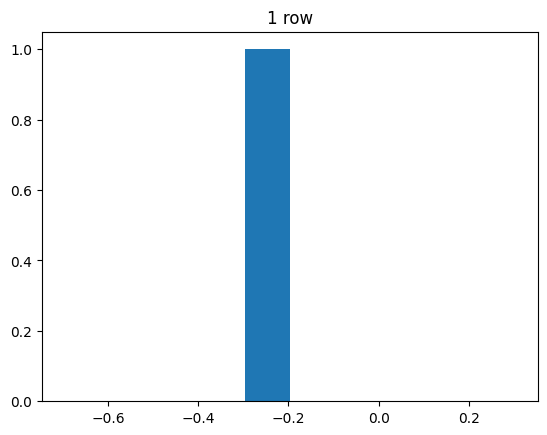

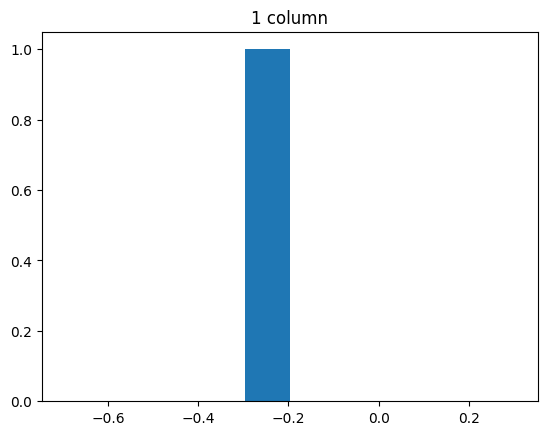

None
[ 1.13544819  1.21048527 -0.39759283] [1.20712983 0.01432778 0.03253285] [0.38323779 0.91565595] [0.45910433 1.33332376]


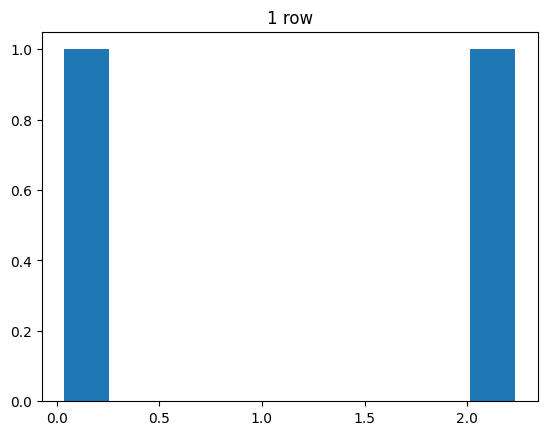

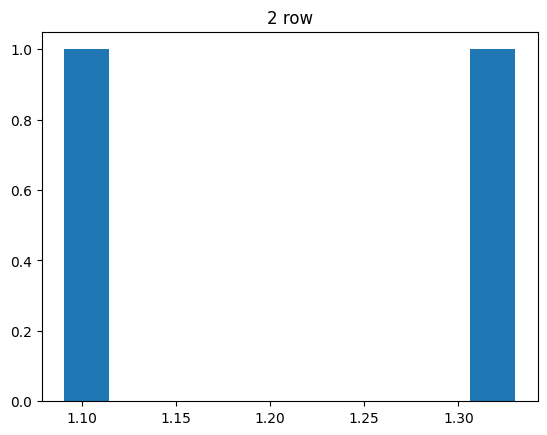

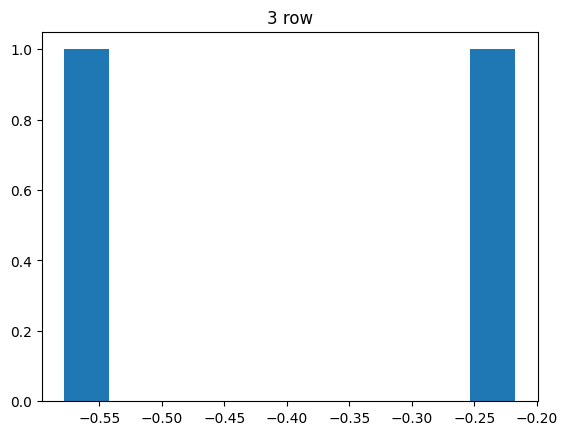

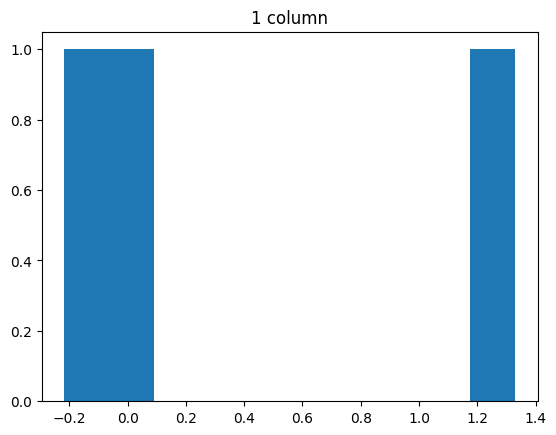

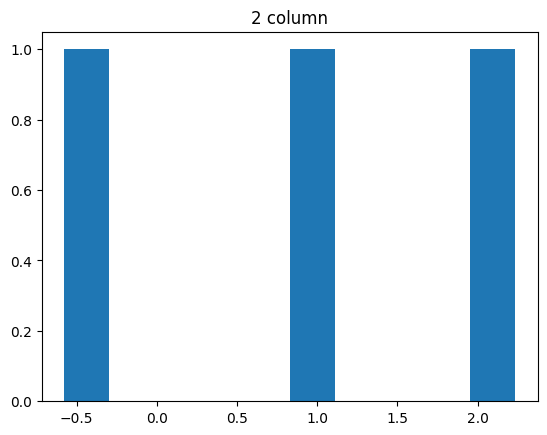

None


In [14]:
def matrix(m, n):
    mat = np.random.randn(m, n)
    row_means = np.mean(mat, axis=1)
    row_vars  = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_vars  = np.var(mat, axis=0)
    print(row_means, row_vars, col_means, col_vars)

    for i in range(m):
        plt.hist(mat[i], bins=10)
        plt.title(f"{i+1} row")
        plt.show()
    for j in range(n):
        plt.hist(mat[:, j], bins=10)
        plt.title(f"{j+1} column")
        plt.show()

print(matrix(1,1))
print(matrix(3,2))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [17]:
def chess(m, n, a, b):
    mat = []
    for i in range(m):
        row = []
        for x in range(n):
            if (i + x) % 2 == 0:
                row.append(a)
            else:
                row.append(b)
        mat.append(row)
    return mat

print(chess(2,3,0,1))
print(chess(3,3,0,8))

[[0, 1, 0], [1, 0, 1]]
[[0, 8, 0], [8, 0, 8], [0, 8, 0]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

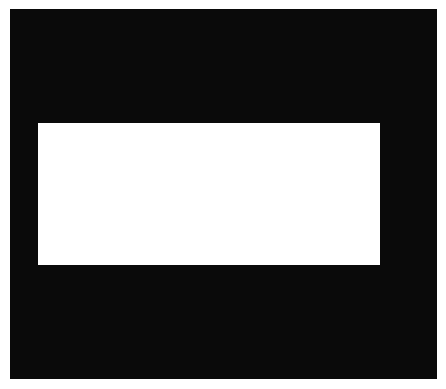

absolute cinema


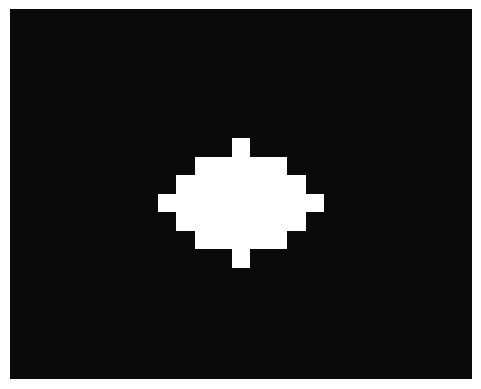

absolute cinema


In [36]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    rect = np.full((m, n, 3), background_color, dtype=np.uint8)
    x = (n - b) // 2
    y = (m - a) // 2
    rect[y:y + a, x:x + b] = rectangle_color
    plt.imshow(rect)
    plt.axis('off')
    plt.show()
    return("absolute cinema")

print(draw_rectangle(5,12,13,15,255,10))

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    ell = np.full((m, n, 3), background_color, dtype=np.uint8)
    y, x = np.ogrid[:m, :n]
    cy = m // 2
    cx = n // 2
    mask = ((x-cx)**2/b**2+(y-cy)**2/a**2) <= 1
    ell[mask] = ellipse_color
    plt.imshow(ell)
    plt.axis('off')
    plt.show()
    return("absolute cinema")

print(draw_ellipse(3,4,20,25,255,10))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [50]:
def find(series, p):
    series = np.array(series)
    mean = np.mean(series)
    var = np.var(series)
    std = np.std(series)
    max = []
    min = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            max.append(i)
        if series[i] < series[i-1] and series[i] < series[i+1]:
            min.append(i)
    avg = np.convolve(series, np.ones(p)/p, mode='valid')
    return {"mean": mean, "var": var, "std": std, "max": max, "min": min, "avg": avg}

print(find([1,3,3,7,5,6],3))
print(find([4,4,4,68,0,6],4))


{'mean': np.float64(4.166666666666667), 'var': np.float64(4.138888888888889), 'std': np.float64(2.034425935955617), 'max': [3], 'min': [4], 'avg': array([2.33333333, 4.33333333, 5.        , 6.        ])}
{'mean': np.float64(14.333333333333334), 'var': np.float64(579.2222222222222), 'std': np.float64(24.067036008246262), 'max': [3], 'min': [4], 'avg': array([20. , 19. , 19.5])}


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [52]:
def one_hot_encode(vector):
    vector = np.array(vector)
    x = vector.max() + 1
    encoded = np.zeros((vector.size, x), dtype=int)
    encoded[np.arange(vector.size), vector] = 1
    return encoded

print(one_hot_encode([3,3,0,9,0]))
print(one_hot_encode([0,1,3,2]))

[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]
